Topics to be covered in this Notebook:

1. Data Preprocessing techniques
2. train and test split
3. feature scaling
4. Supervised - Regression Techniques
5. Supervised - Classification Techniques

- Author : Aritra Sen (www.aritrasen.com)
- LinkedIn : https://www.linkedin.com/in/aritrasen/

### 1. Data preprocessing techniques

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'https://github.com/aritrasen87/CU_DataScience/blob/3353186be506ae9868057d66f8049e69c3b1e369/Data.csv?raw=true'

In [3]:
dataset  = pd.read_csv(data_path)

In [12]:
dataset.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [13]:
# check for missing values
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [14]:
cols = ['Age','Salary']

In [15]:
y = dataset['Purchased'].copy()
X = dataset.drop(labels=['Purchased'],axis=1)

# Taking care of missing data
for col in cols:
    X[col].fillna(np.mean(X[col]) , inplace = True)

In [16]:
# checking if missing values imputer or not
X.isnull().sum()

Country    0
Age        0
Salary     0
dtype: int64

#### Handling categorical data

In [19]:
X.dtypes

Country     object
Age        float64
Salary     float64
dtype: object

In [20]:
# Encoding categorical data
# Encoding the Independent Variable

# multicollinearity guard in get_dummies for One Hot Encoding
one_hot = pd.get_dummies(X['Country'], drop_first=True)
one_hot

,Germany,Spain
0,0,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,0
6,0,1
7,0,0
8,1,0
9,0,0


In [21]:
X = X.join(one_hot)
X

,Country,Age,Salary,Germany,Spain
0,France,44.000000,72000.000000,0,0
1,Spain,27.000000,48000.000000,0,1
2,Germany,30.000000,54000.000000,1,0
3,Spain,38.000000,61000.000000,0,1
4,Germany,40.000000,63777.777778,1,0
5,France,35.000000,58000.000000,0,0
6,Spain,38.777778,52000.000000,0,1
7,France,48.000000,79000.000000,0,0
8,Germany,50.000000,83000.000000,1,0
9,France,37.000000,67000.000000,0,0


In [22]:
X.drop(labels=['Country'],axis=1,inplace=True)
X

,Age,Salary,Germany,Spain
0,44.000000,72000.000000,0,0
1,27.000000,48000.000000,0,1
2,30.000000,54000.000000,1,0
3,38.000000,61000.000000,0,1
4,40.000000,63777.777778,1,0
5,35.000000,58000.000000,0,0
6,38.777778,52000.000000,0,1
7,48.000000,79000.000000,0,0
8,50.000000,83000.000000,1,0
9,37.000000,67000.000000,0,0


In [23]:
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [24]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [25]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Train and Test Split

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[['Age','Salary']] = sc_X.fit_transform(X_train[['Age','Salary']])
X_test[['Age','Salary']] = sc_X.transform(X_test[['Age','Salary']])


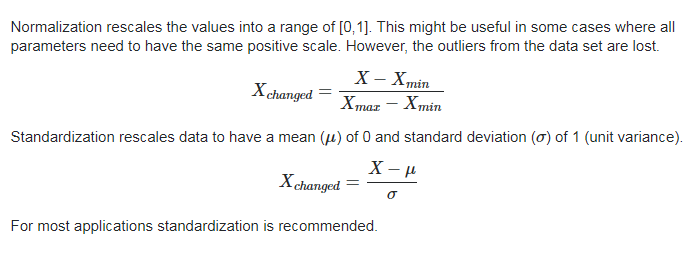

In [33]:
from IPython.display import Image
Image("Capture.png")

## Machine Learning can be divided mainly in two sections –

- Supervised Learning – Where we teach the machines with correct answers or labels. Ex – Regression or Classification.
- Unsupervised Learning – We deal with unlabeled data and we either do Clustering or we go for Dimension Reduction.

Kaggle - Diamond Price Prediction - https://www.kaggle.com/shivam2503/diamonds

In [36]:
data_path = 'https://github.com/aritrasen87/CU_DataScience/blob/3353186be506ae9868057d66f8049e69c3b1e369/diamonds.csv?raw=true'
df = pd.read_csv(data_path , index_col = 0)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df.isnull().sum() # no missing values in the data

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
df.corr()

/tmp/ipykernel_2253/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


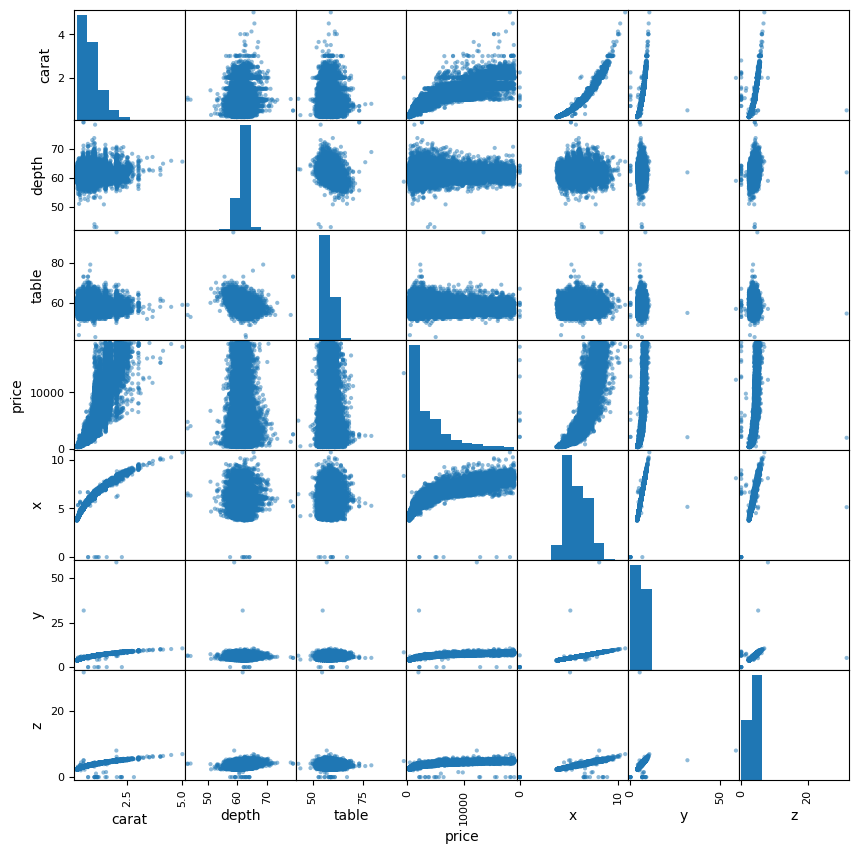

In [40]:
# From above we can see strong +correlation between x,y,z and Carat , lets confirm by plotting
import matplotlib.pyplot as plt
%matplotlib inline


pd.plotting.scatter_matrix(df, figsize =(10,10))
plt.show()

In [43]:
#Label Encoding

# Specify the correct order
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'] 
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

#Cut Column
df.cut = df.cut.astype("category",
  ordered=True,
  categories=cut_order
).cat.codes 

# #Color Column
# df.color = df.color.astype("category",
#   ordered=True,
#   categories=color_order
# ).cat.codes

# #Clarity Column
# df.clarity = df.clarity.astype("category",
#   ordered=True,
#   categories=clarity_order
# ).cat.codes

TypeError: NDFrame.astype() got an unexpected keyword argument 'ordered'

In [45]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
